In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SQLContext
sc = pyspark.SparkContext()
sqlContext = SQLContext(sc)
print(sc)
print(sqlContext)
from pyspark.sql import SparkSession
from pyspark.sql import types as stypes
from pyspark.sql.functions import udf
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL cleaning data") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()
import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
column_name = ["timestamp", "num_at_risk", "num_events", "KM_estimate", "standar_error", "lower_CI", "upper_CI"]
column_names = []

for k in range(5):
    for i in column_name:
        column_names.append(i+"_"+str(k+1))

#column_names
input_df = pd.read_csv("/Users/Mat/Downloads/final_df_fill/output_km/fileO.csv", names=column_names)

In [83]:
df_1_tag = input_df\
[["timestamp_1","num_at_risk_1","num_events_1","KM_estimate_1","standar_error_1","lower_CI_1","upper_CI_1"]].\
loc[input_df['timestamp_1'] != 0.0]
df_2_tag = input_df\
[["timestamp_2","num_at_risk_2","num_events_2","KM_estimate_2","standar_error_2","lower_CI_2","upper_CI_2"]].\
loc[input_df['timestamp_2'] != 0.0]
df_3_tag = input_df\
[["timestamp_3","num_at_risk_3","num_events_3","KM_estimate_3","standar_error_3","lower_CI_3","upper_CI_3"]].\
loc[input_df['timestamp_3'] != 0.0]
df_4_tag = input_df\
[["timestamp_4","num_at_risk_4","num_events_4","KM_estimate_4","standar_error_4","lower_CI_4","upper_CI_4"]].\
loc[input_df['timestamp_4'] != 0.0]
df_5_tag = input_df\
[["timestamp_5","num_at_risk_5","num_events_5","KM_estimate_5","standar_error_5","lower_CI_5","upper_CI_5"]].\
loc[input_df['timestamp_5'] != 0.0]

## All groups

In [23]:
fig_size = []
fig_size.append(15)
fig_size.append(15)
plt.rcParams["figure.figsize"] = fig_size

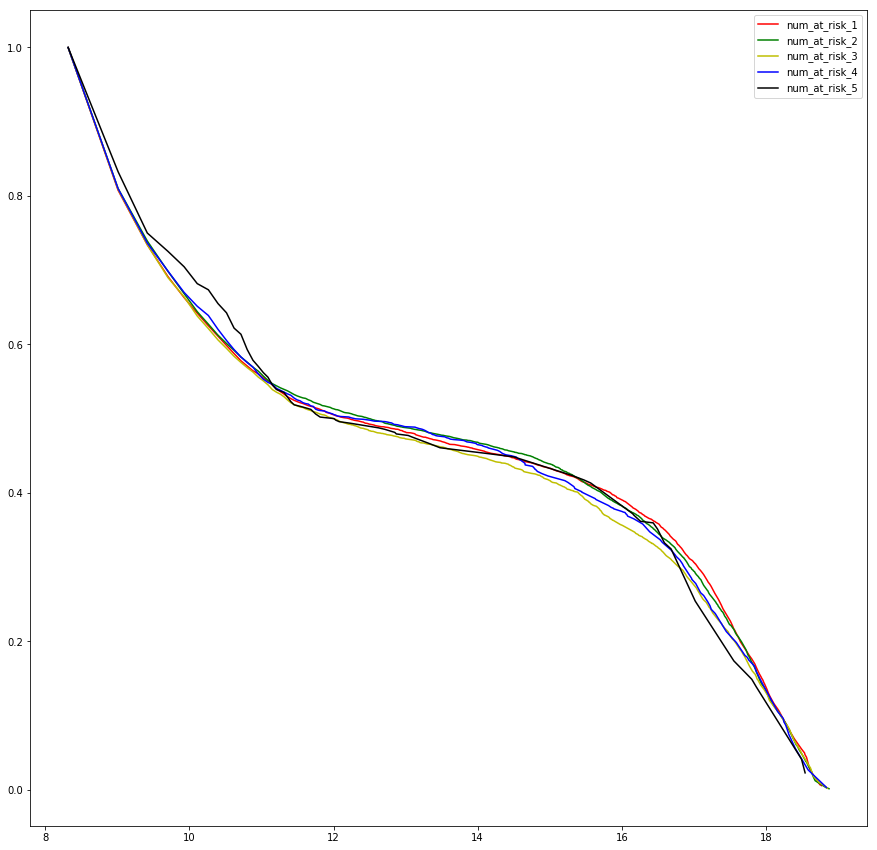

In [92]:
tag_1, = plt.plot(np.log(df_1_tag.timestamp_1),\
                   df_1_tag.num_at_risk_1/(input_df.num_at_risk_1.max()),'r', label='tag_1')
tag_2, = plt.plot(np.log(df_2_tag.timestamp_2),\
                   df_2_tag.num_at_risk_2/(input_df.num_at_risk_2.max()),'g', label='tag_2')
tag_3, = plt.plot(np.log(df_3_tag.timestamp_3),\
                   df_3_tag.num_at_risk_3/(input_df.num_at_risk_3.max()),'y', label='tag_3')
tag_4, = plt.plot(np.log(df_4_tag.timestamp_4),\
                   df_4_tag.num_at_risk_4/(input_df.num_at_risk_4.max()),'b', label='tag_4')
tag_5, = plt.plot(np.log(df_5_tag.timestamp_5),\
                   df_5_tag.num_at_risk_5/(input_df.num_at_risk_5.max()),'k', label='tag_5')
plt.legend(column_names[1::7])

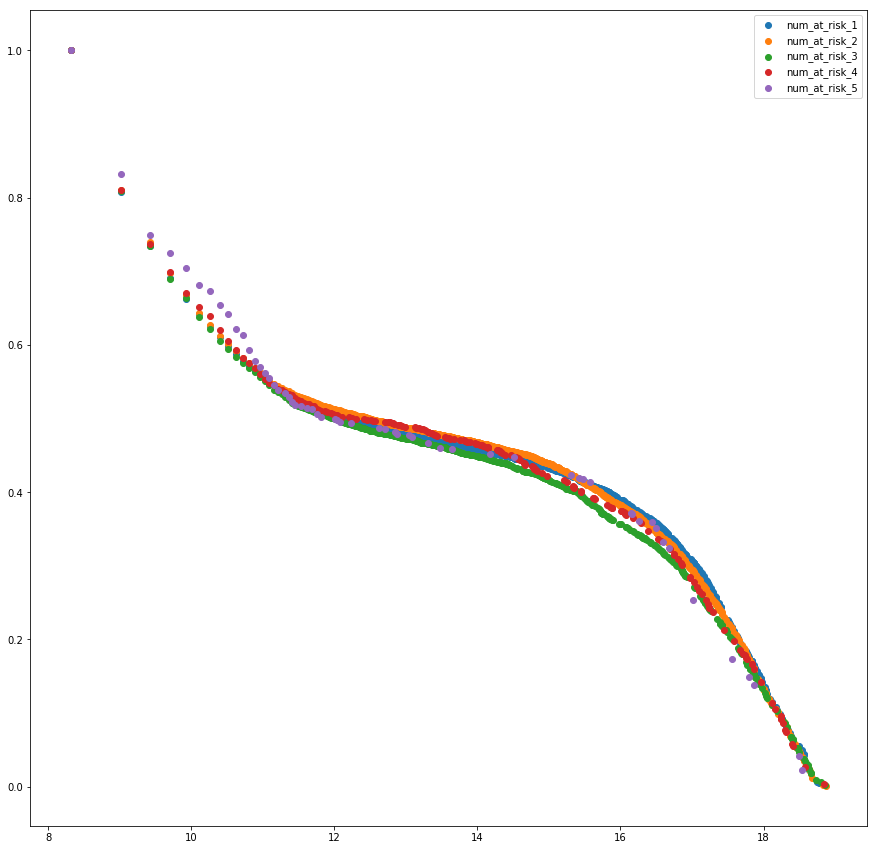

In [108]:
plt.scatter(np.log(df_1_tag.timestamp_1), df_1_tag.num_at_risk_1/(input_df.num_at_risk_1.max()), label='tag_1')
plt.scatter(np.log(df_2_tag.timestamp_2), df_2_tag.num_at_risk_2/(input_df.num_at_risk_2.max()), label='tag_2')
plt.scatter(np.log(df_3_tag.timestamp_3), df_3_tag.num_at_risk_3/(input_df.num_at_risk_3.max()), label='tag_3')
plt.scatter(np.log(df_4_tag.timestamp_4), df_4_tag.num_at_risk_4/(input_df.num_at_risk_4.max()), label='tag_4')
plt.scatter(np.log(df_5_tag.timestamp_5), df_5_tag.num_at_risk_5/(input_df.num_at_risk_5.max()), label='tag_5')

plt.legend(column_names[1::7])